In [5]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('walmart_data.csv') # for making changes
df_org = pd.read_csv('walmart_data.csv') # to refer to original dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Observations-

There are 5,50,068 rows and 10 columns in the data.
There are no null values.
The columns user_id, occupation(masked), marital_status, product_category and purchase have integer datatype.
Rest of the columns(product_id, gender, age, city_category, stay_in_current_city_years) are object datatype.

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Observations-

The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

**Converting gender, age, city_category, stay_in_current_city_years and marital status into categorical data**

In [9]:
# Converting some features into categorical data
temp = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
for i in temp:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


Statistical Summary
The below code will tell us the mean, median, min, max, standard deviation etc. for numerical features. Although, here only ‘Purchase’ will be of use to us.

In [10]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


Observations-

Range of purchase amount is 12 dollars to 23961 dollars.
Mean purchase amount is 9264 dollars.
Median purchase amount is 8047 dollars.
Standard deviation of purchase amount is 5023 dollars.
Inter quartile range of purchase amount is 5823 to 12054 dollars.

**Value Counts and Unique Attributes**

In [11]:
# Value counts for first 5 columns
for i in df.columns[:5]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column User_ID -
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
--------------------------------------------------
Value counts for column Product_ID -
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
--------------------------------------------------
Value counts for column Gender -
Gender
M    414259
F    135809
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Age -
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
-----------------------------------------

In [12]:
for i in df.columns[5:]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column City_Category -
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Stay_In_Current_City_Years -
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Marital_Status -
Marital_Status
0    324731
1    225337
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Product_Category -
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Purchase -
Purchase
7011     191


Obervations-

Most frequent users have made close to 1000 purchases.
Least frequent users have made 6 or 7 purchases.
‘P00265242’ is the most sold product.
414,259 users in the dataset are male and 135,809 female.
People in age group 26–35 make more purchases than any other age group.
People of city category B make more purchases than other city city categories.
People who have stayed in their city for only one year make more purchases than others.
People who have stayed for less than a year or more than 4 years make least number of purchases.
Unmarried people make more purchases than married people.
Product categories 5, 1 and 8 sell more than other categories.
Product categories 17 and 9 sell the least.

Insights -

Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
Ads can be targetted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
Ads can be targetted towards people of city category B. Inventory in these cities can be replenished.
Ads can be targetted towards people who have spent between 1 to 2 years in their cities.
Ads can be targetted towards unmarried people.
Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.

**Missing Values and Outlier Detection**

In [13]:
# Finding outliers using IQR method
for i in ['Purchase']:
    outliers = []
    p25 = np.percentile(df[i], 25)
    p75 = np.percentile(df[i], 75)
    iqr = p75 - p25
    max_cut = p75 + iqr*1.5
    min_cut = max(0, p25 - iqr*1.5)
    outliers = df.loc[(df[i]<min_cut) | (df[i]>max_cut),i]
    print('Outliers for the column',i,'-')
    print(outliers)
    print('Number of outliers-', len(outliers))
    print('Percentage of outliers =', round((len(outliers)/len(df[i]))*100,2),'%')

Outliers for the column Purchase -
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers- 2677
Percentage of outliers = 0.49 %


Purchase columns contains 2677 outliers. This is 0.49% of total number of entries.



In [14]:
# Checking for missing values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Visual Analysis**

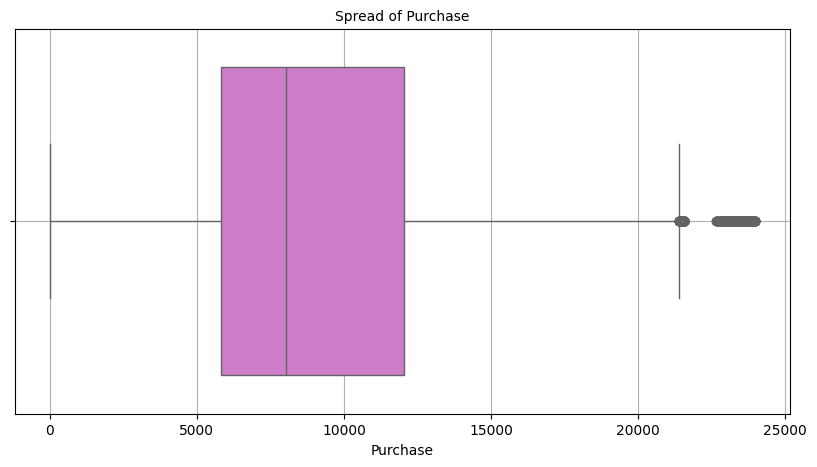

In [15]:
 # Creating box plot of 'Purchase' column
temp = ['Purchase']
plt.figure(figsize = (10,5))
for i in range(len(temp)):
#     plt.subplot(1,3,i+1)
    sns.boxplot(x = df[temp[i]],color = 'orchid')
    plt.title('Spread of {feature}'.format(feature = temp[i]), fontsize = 10)
    plt.grid()
plt.show()

Observations-

Median purchase is about 8000 dollars.
There are many outliers.
Inter Quartile Range is 6000 to 12000 dollars.

Insights-

Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.

<ipython-input-16-df1a6e82d516>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[temp[i]], color='orchid')
<ipython-input-16-df1a6e82d516>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[temp[i]], color='orchid')
<ipython-input-16-df1a6e82d516>:6: UserWarning: 

`distplot` is a deprecated

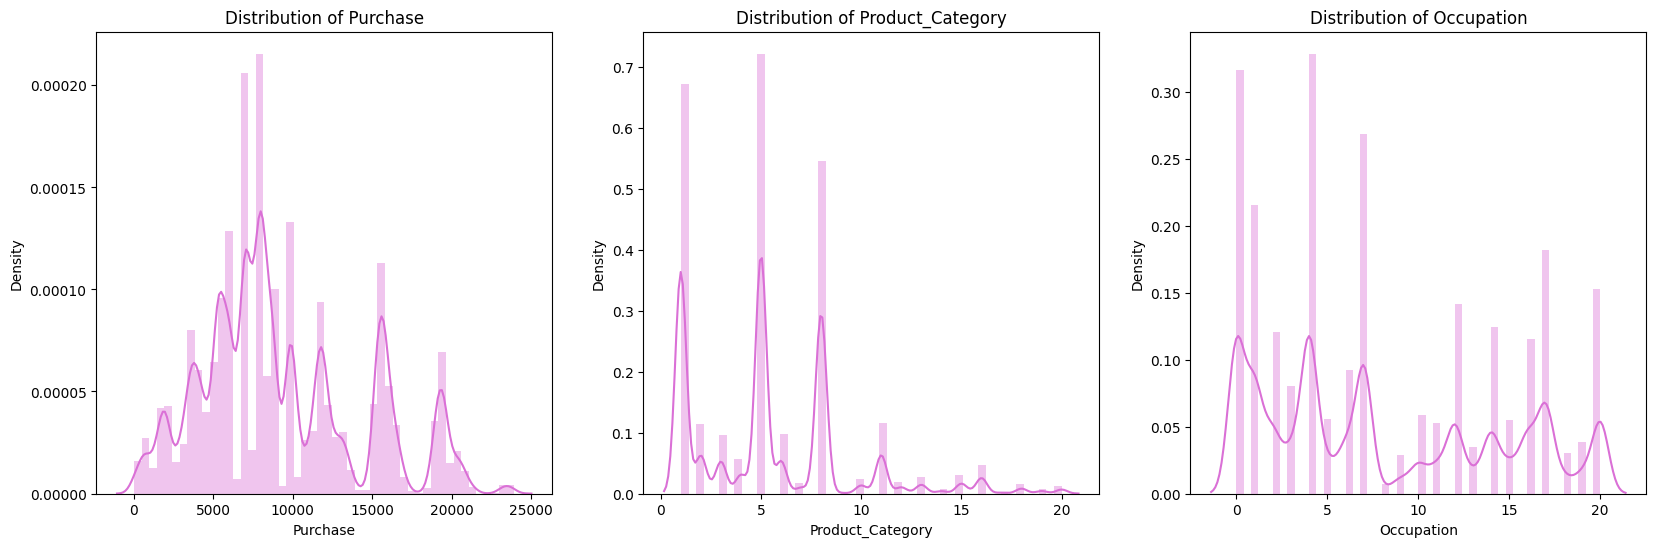

In [16]:
# Creating distribution plots for some features
temp = ['Purchase', 'Product_Category', 'Occupation']
plt.figure(figsize=(20,6))
for i in range(len(temp)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[temp[i]], color='orchid')
    plt.title('Distribution of {feature}'.format(feature = temp[i]))

plt.show()

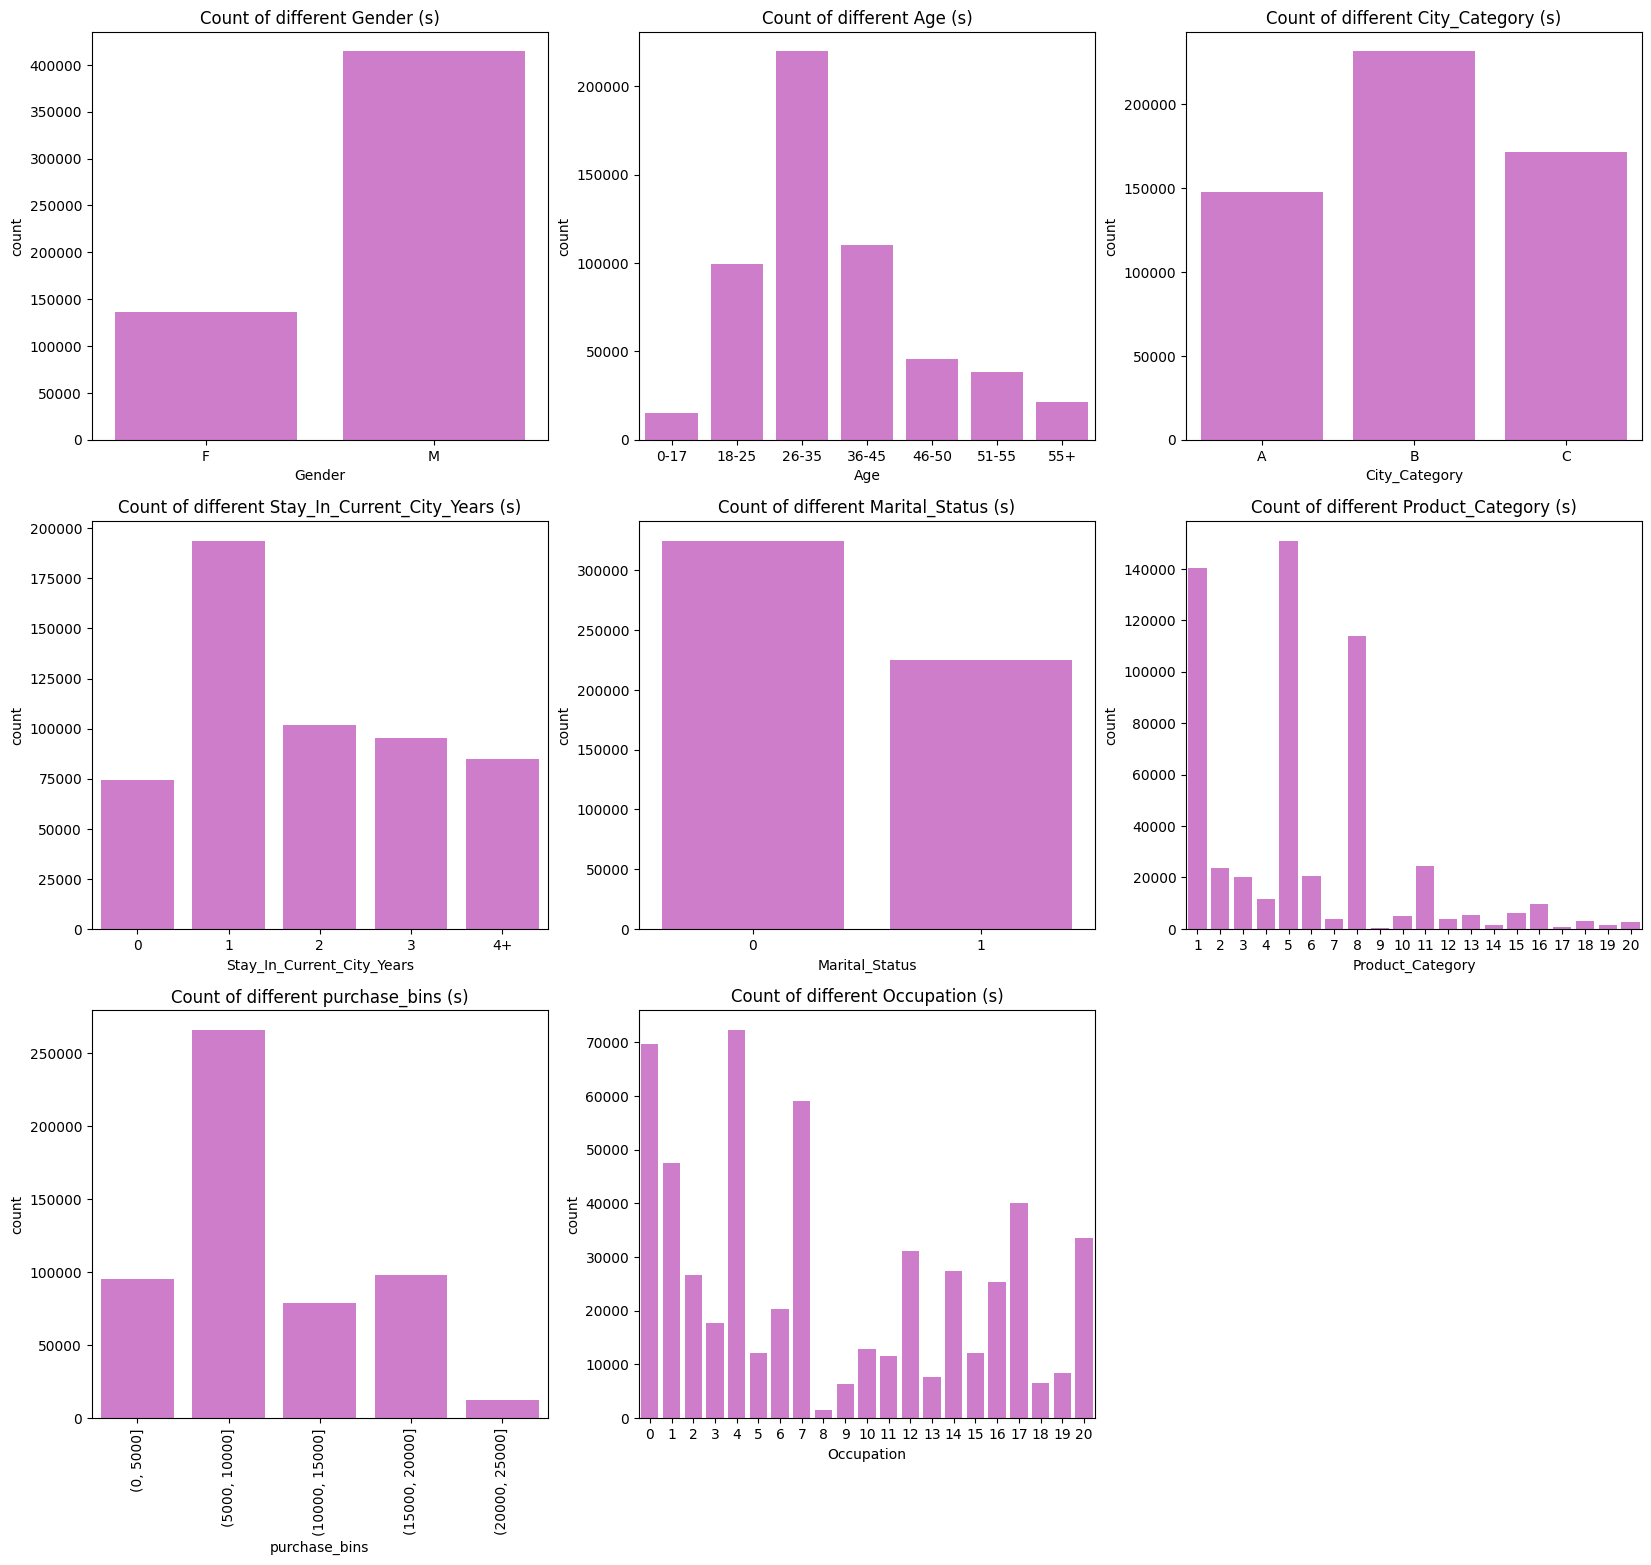

In [17]:
# Creating bins of purchase amount
df['purchase_bins'] = pd.cut(df['Purchase'], bins = [0,5000,10000,15000,20000,25000])

# Creating count plots for categorical variables
plt.figure(figsize = (20,18))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category', 'purchase_bins', 'Occupation']
for i in range(len(temp)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[temp[i]], color = 'orchid')
    plt.title('Count of different {temp_i} (s)'.format(temp_i = temp[i]))
    if temp[i] in ['purchase_bins']:
        plt.xticks(rotation = 90)
plt.show()

Observations-

More puchases have been made by males than females.
People of age group 26–35 have made the maximum number of purchases.
People in cities of category B have made maximum number of purchases.
People who have stayed in their city for a year have made the maximum number of purchases.
Unmarried people have made more purchases than married peole.
Products of category 1, 5 and 8 sold most frequently.
Purchases of amount (5000, 10000] were maximum in number.
People of occupation 0,4 and 7 have made more purchases than other occupations.
People of occupation 8 have made least purchases.

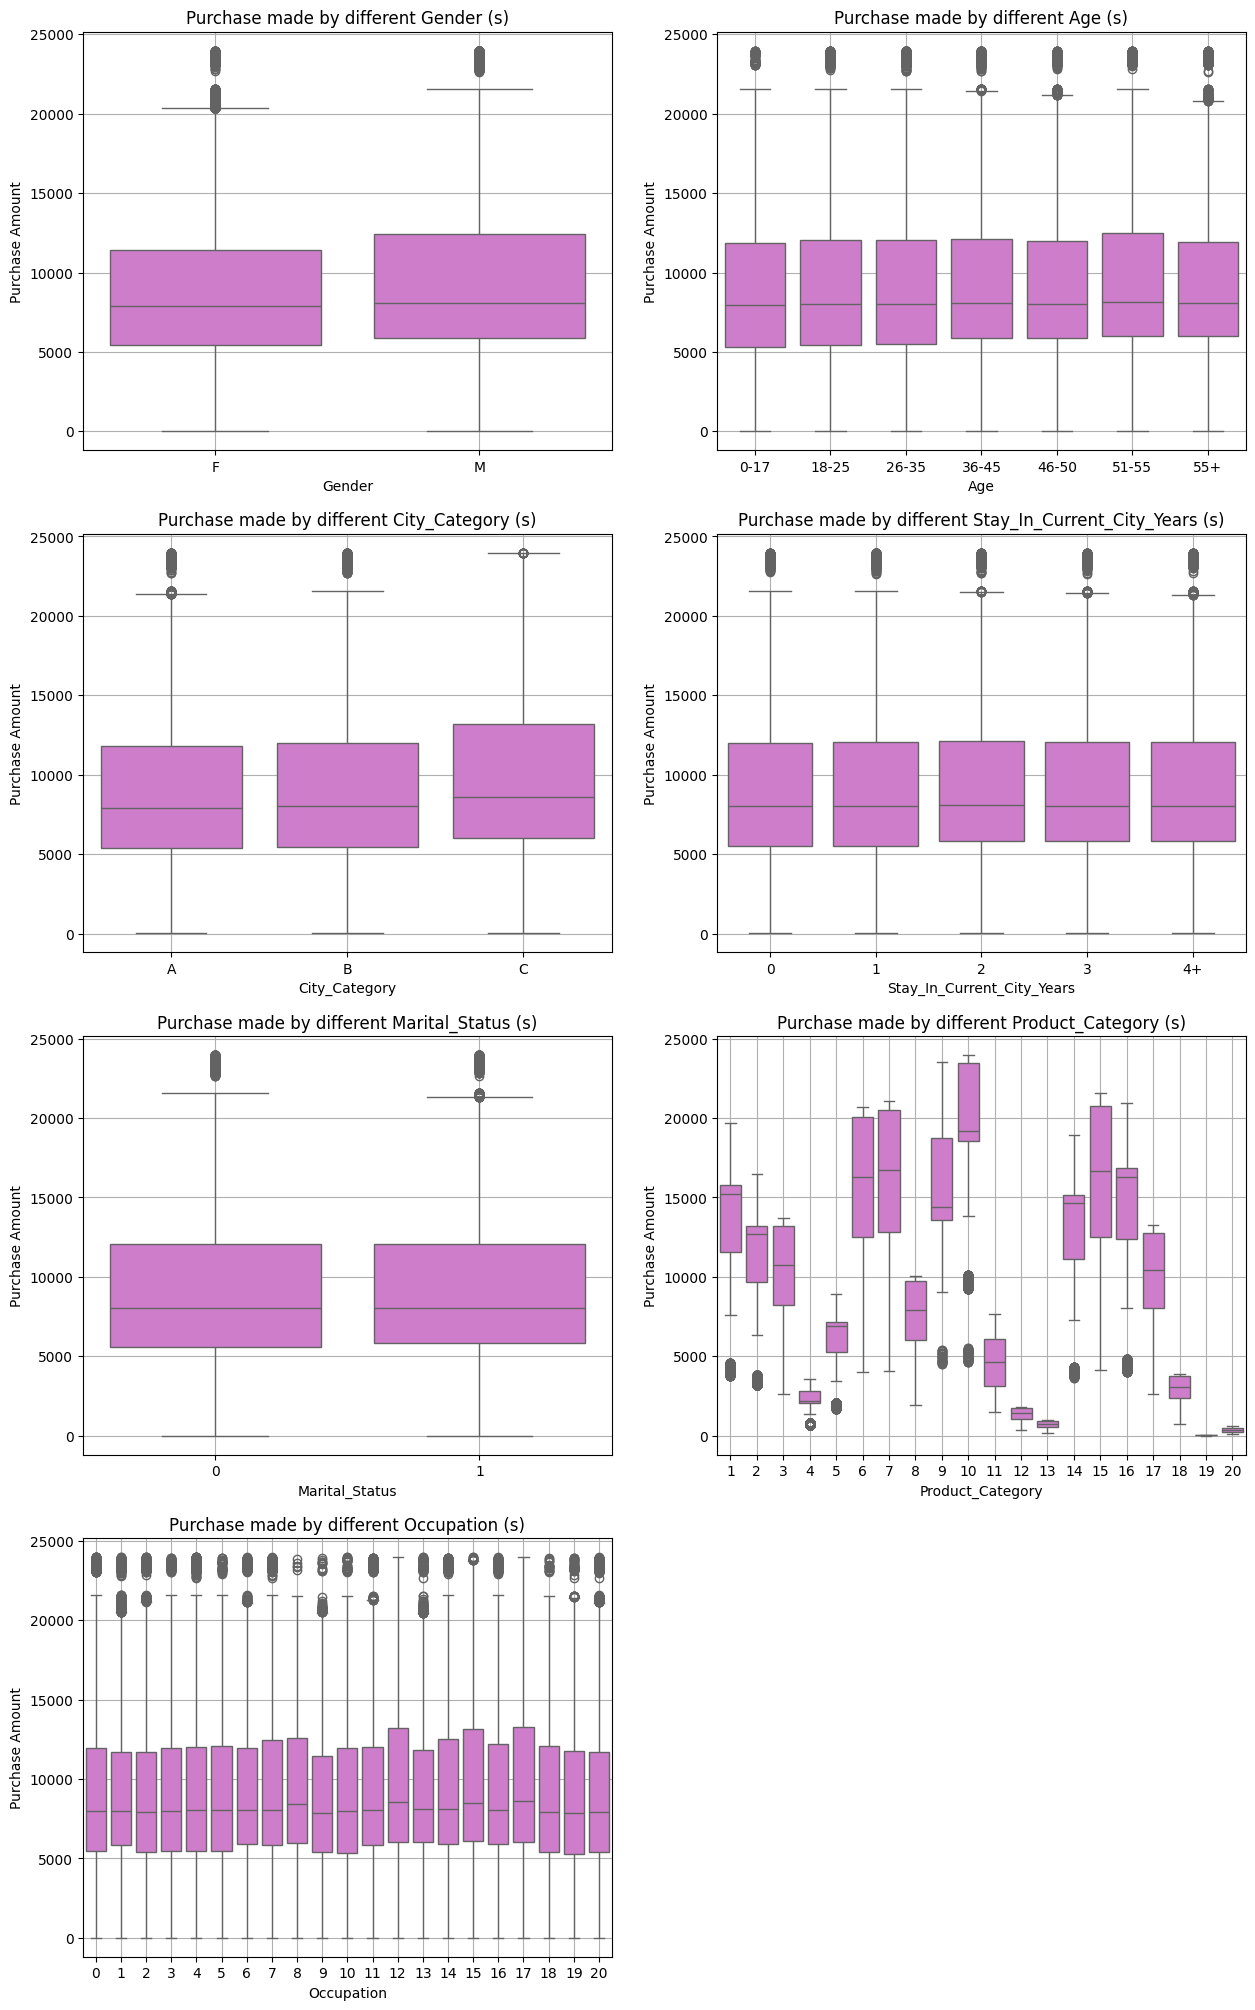

In [18]:
# Creating bi-variate boxplots (purchase vs categorical-variable)
plt.figure(figsize = (15,25))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category','Occupation']
for i in range(len(temp)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[temp[i]], y = df['Purchase'], color = 'orchid')
    plt.title('Purchase made by different {temp_i} (s)'.format(temp_i = temp[i]))
    plt.ylabel('Purchase Amount')
    plt.grid()
plt.show()

Observations-

Median purchase amounts of males and females are similar.
Median purchase amounts of all age groups are similar.
Median purchase amount of city of category C is slightly higher than other city categories.
Median purchase amounts of product category 10 is highest, category 19 is lowest.
Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

Insights-

Ads for slightly expensive products can be targeted towards people with occupation 12 and 17. (See median expenses of all occupations below)


**Coreleation Analysis**

In [42]:
df.corr(numeric_only=True)

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


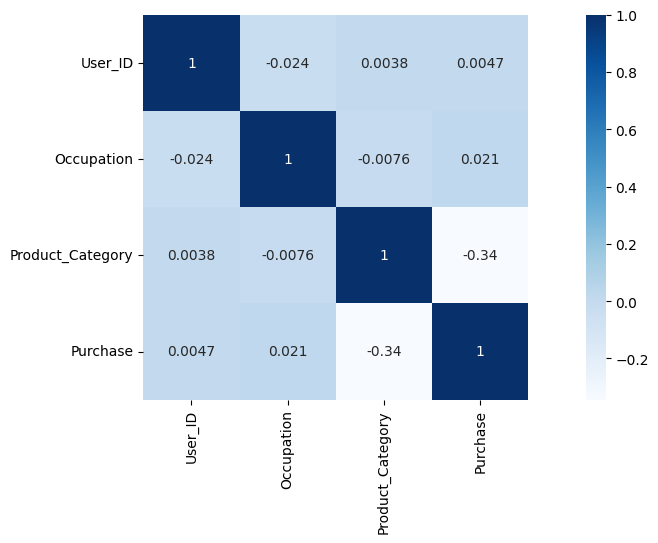

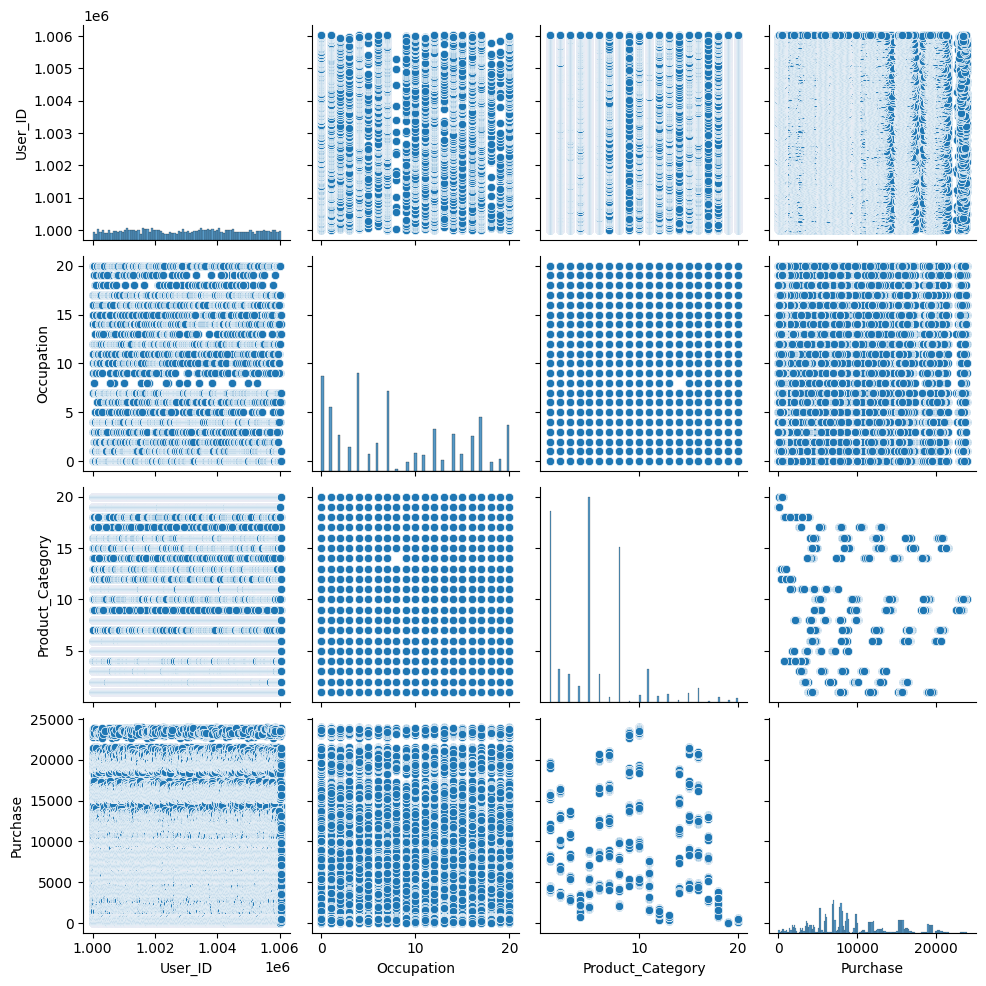

In [44]:
plt.figure(figsize = (15, 5))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap="Blues", square=True)

sns.pairplot(df)
plt.show()

In [19]:
df_copy = df_org.copy()
df_copy['Gender'].replace({'F' : 1, 'M': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)

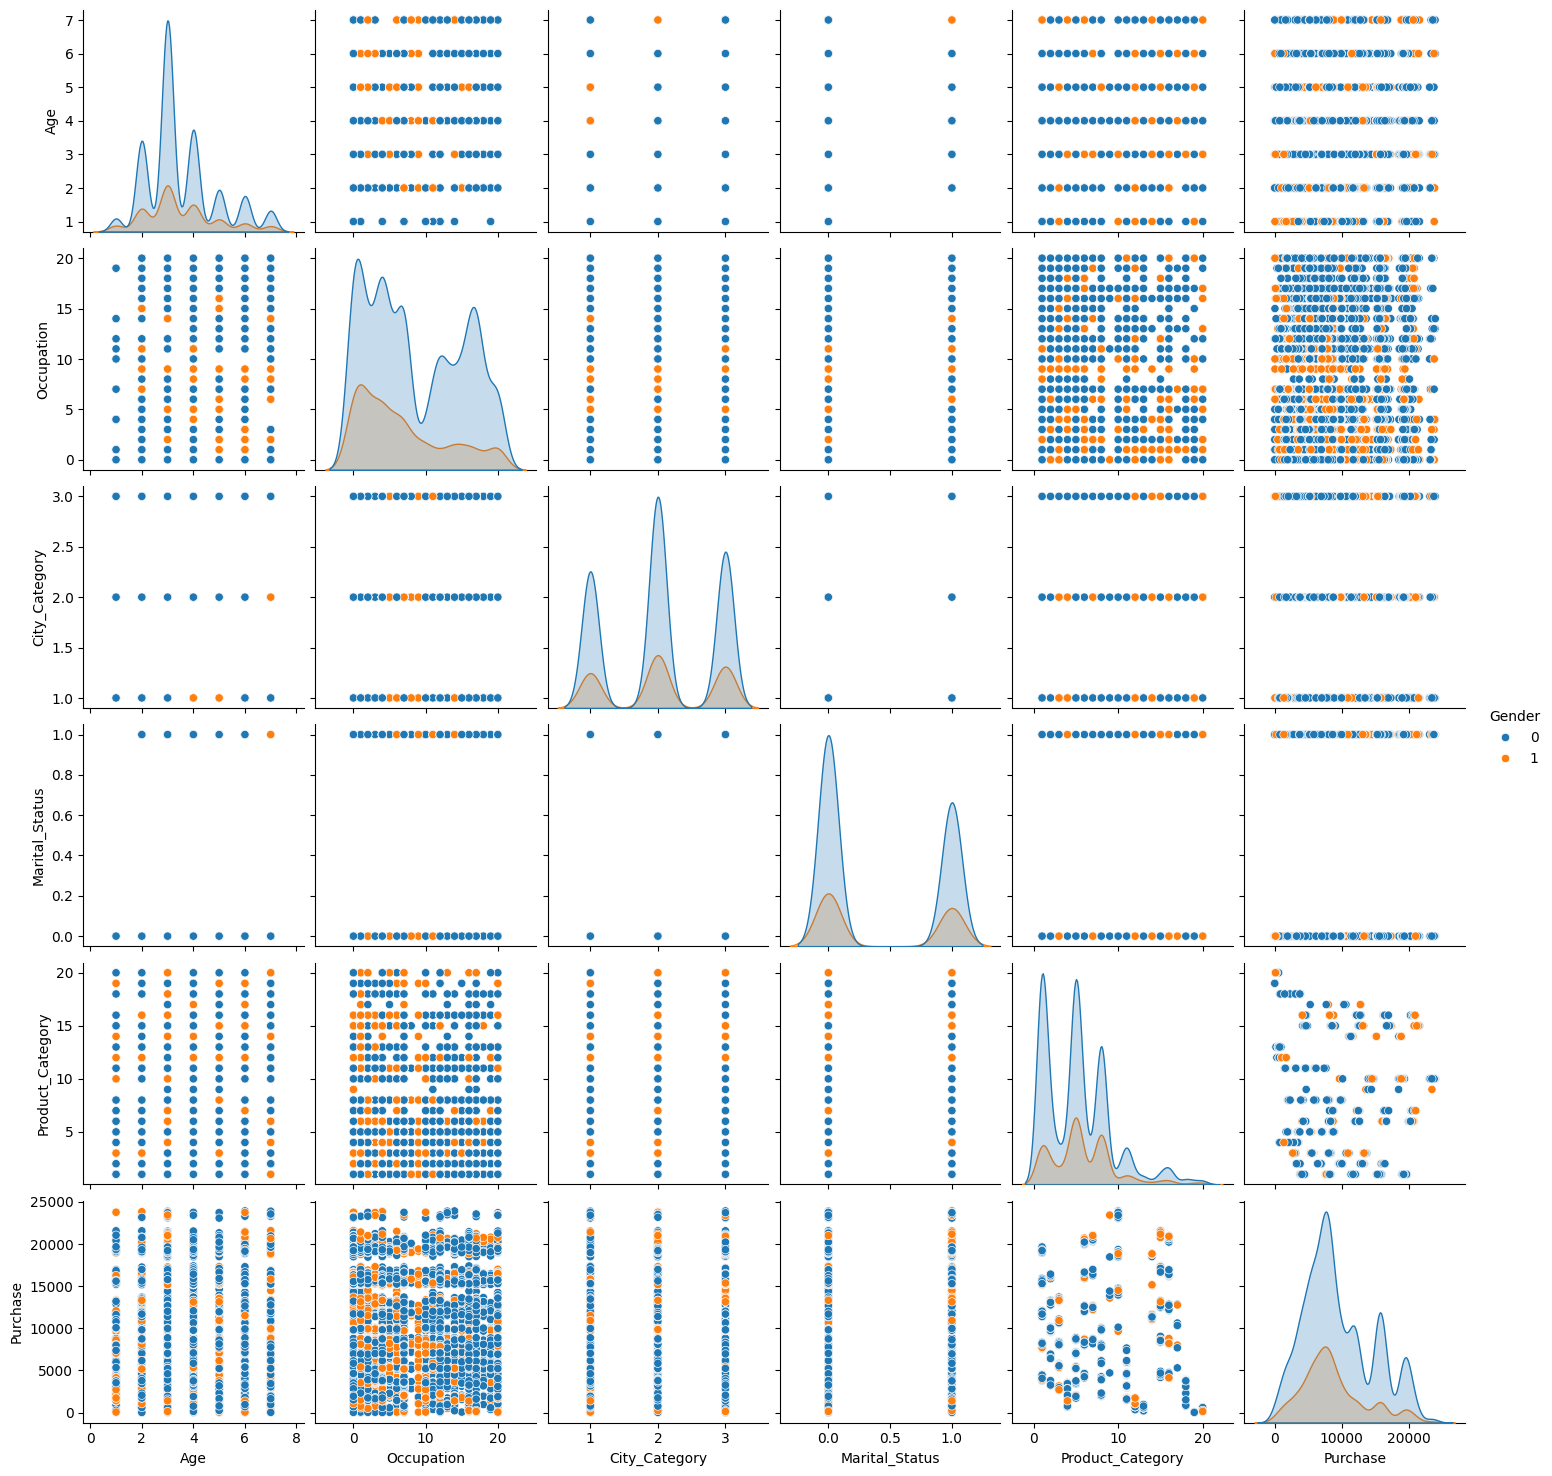

In [22]:
# Taking a sample of 10000 entries to create pair wise plots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde')
plt.show()

Observations-

Both males and females of city category B make more purchases compared to city categories A and C.
Females purchase products of category 4, 11, 15, 17 and 18 less often.
Most popular product category among males is 1.
Most popular product category among females is 5. It is popular among male customers as well.
Females with occupation 0–10 made more purchases than females with occupations 11–20.

Sampling
**Male and Female users**

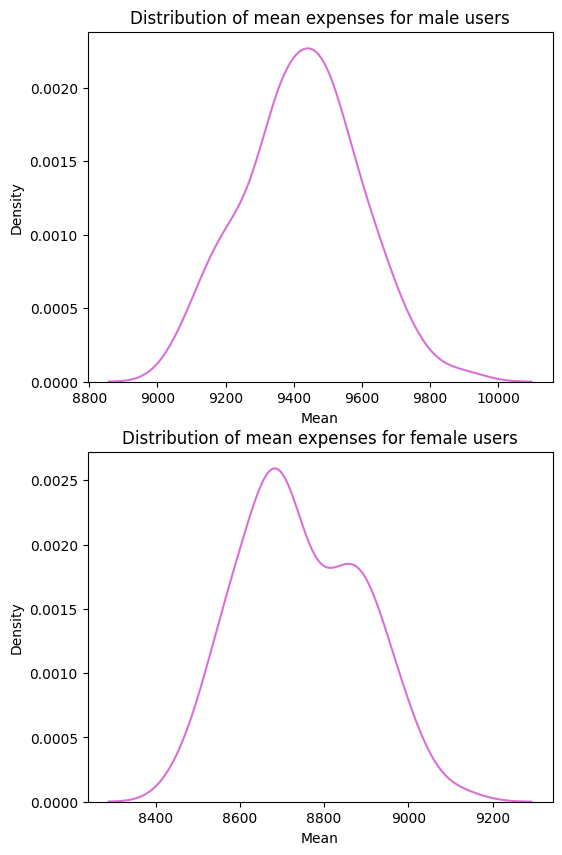

In [23]:
# Taking samples of 1000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [24]:
# Finding different confidence intervals for males and females
for i in ['males', 'females']:
    print('For {g}-'.format(g = i))
    if i == 'males':
        means = means_m
        gen = 'M'
    else:
        means = means_f
        gen = 'F'
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Gender']==gen, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Gender']==gen, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For males-
Mean of sample means = 9423.935459999999
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 166.70167991933505
Standard deviation of population = 5092.18620977797
99% CONFIDENCE INTERVAL for mean expense by males users-
(9067.76, 9842.2)
95% CONFIDENCE INTERVAL for mean expense by males users-
(9111.78, 9733.13)
90% CONFIDENCE INTERVAL for mean expense by males users-
(9149.21, 9698.11)
--------------------------------------------------
For females-
Mean of sample means = 8745.29716
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 142.55979332909533
Standard deviation of population = 4767.233289291458
99% CONFIDENCE INTERVAL for mean expense by females users-
(8470.32, 9076.69)
95% CONFIDENCE INTERVAL for mean expense by females users-
(8503.87, 9004.26)
90% CONFIDENCE INTERVAL for mean expense by females users-
(8536.07, 8984.11)
--------------------------------------------------


Observations-

Mean purchase amount for females = 8734.56
Mean purchase amount for males = 9437.52
95% confidence interval for purchase amounts of females is less than males without any intersection.
We can say with 95% confidence that females spend less than males.


Insights-

Ads for products which cost between 9151 and 9790 can be targetted towards males.
Ads for products which cost between 8507 and 9051 can be targetted towards females.

**Married and Unmarried users**

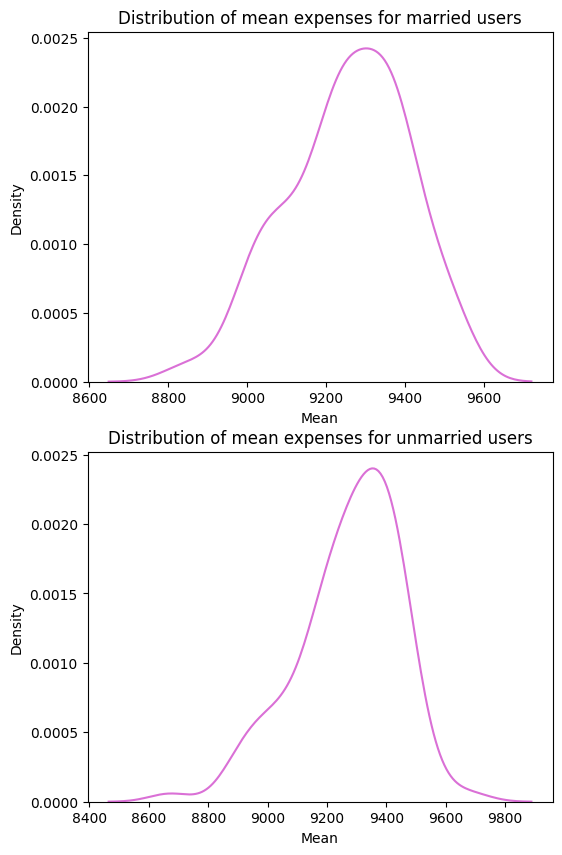

In [25]:
# Taking samples of 1000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [26]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9272.812639999998
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 171.83524417211504
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users-
(8771.32, 9623.68)
95% CONFIDENCE INTERVAL for mean expense by married users-
(8907.78, 9517.29)
90% CONFIDENCE INTERVAL for mean expense by married users-
(8940.55, 9482.29)
--------------------------------------------------
For unmarried-
Mean of sample means = 9255.393489999999
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 152.85738374520858
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8854.04, 9534.84)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8976.99, 9525.36)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9004.13, 9491.66)
--------------------------------------------------


Observations-

Mean expense by married customers is 9261.17
Mean expense by unmarried customers is 9265.90
There’s is overlap between 90%, 95% and 99% confidence intervals for both.
We don’t have enough statistical evidence to compare their expenses.

**For different age groups-**

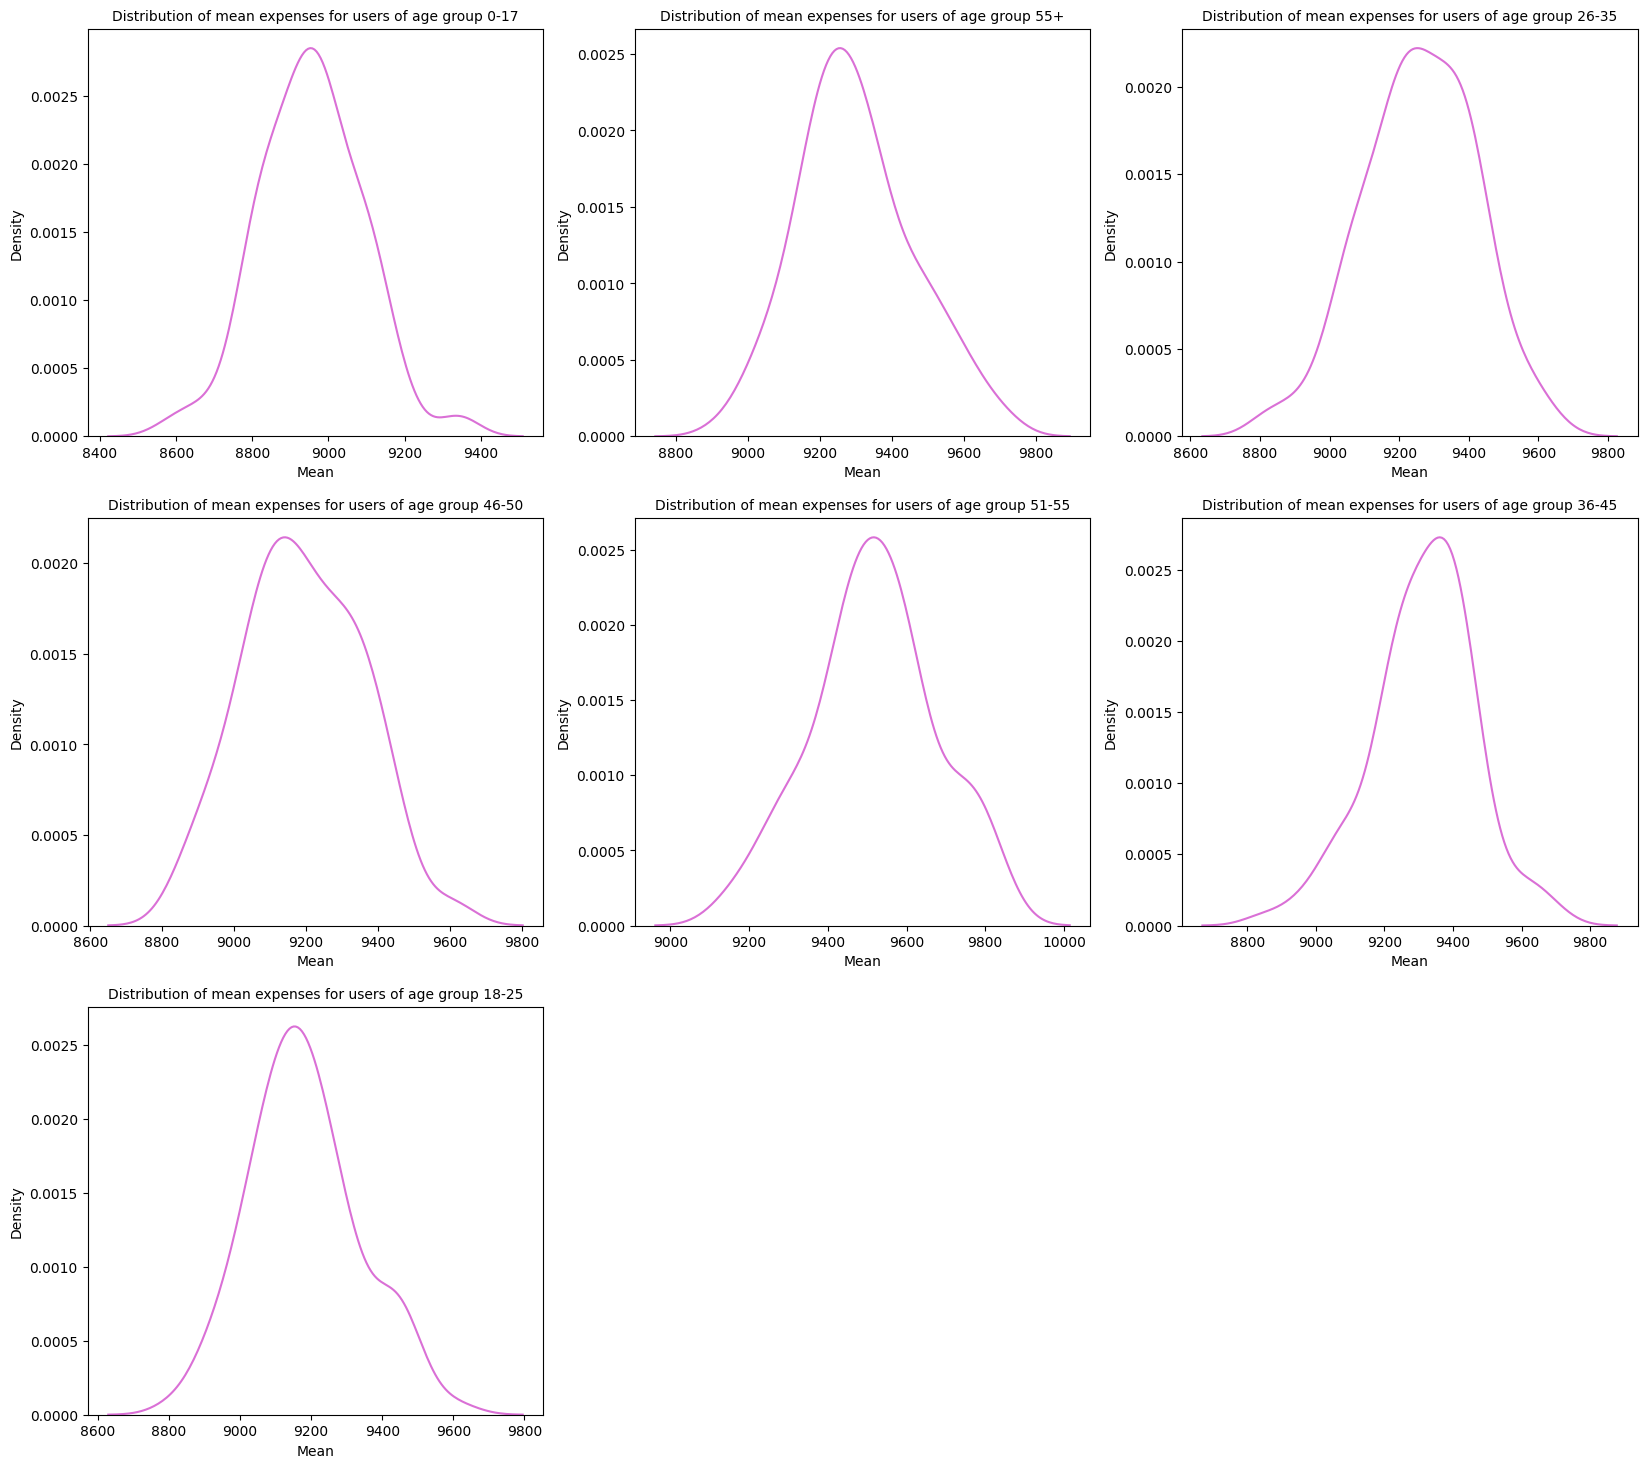

In [27]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [28]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8954.99354
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 134.9980276488082
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8609.75, 9341.09)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8688.56, 9190.79)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8762.42, 9164.63)
--------------------------------------------------
For 55+-
Mean of sample means = 9299.39659
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 159.1564698586956
Standard deviation of population = 5011.4939956034605
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(8962.69, 9699.46)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9028.13, 9615.86)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9047.69, 9602.94)
-----------------------------

Observations-

99% Confidence Interval for 0–17 is less than 51–55 without overlap.
We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.

Insights-

Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

**Are women spending more money per transaction than men? Why or Why not?**

In [45]:
df.groupby(["Gender", "City_Category"])["User_ID"].count()

Gender  City_Category
F       A                 35704
        B                 57796
        C                 42309
M       A                112016
        B                173377
        C                128866
Name: User_ID, dtype: int64

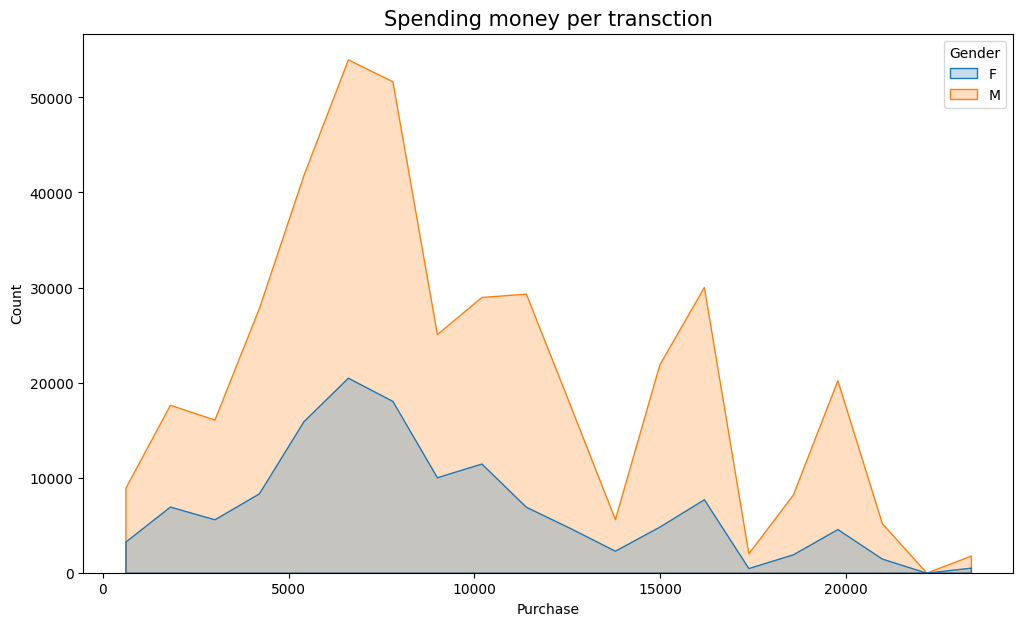

In [46]:
plt.figure(figsize=(12, 7))

plt.title("Spending money per transction", fontsize = 15)
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender", element="poly")

plt.show()

Insights

The amount of money spent by women customers per transaction is quite less than that of men. There would be multiple reasons for that : -
Socio-economic status
Generally male starts earning way before females
Generally male customers earns more than females

In [29]:
#Confidence Interval Construction: Estimating Average Purchase Amount per Transaction
def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [30]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

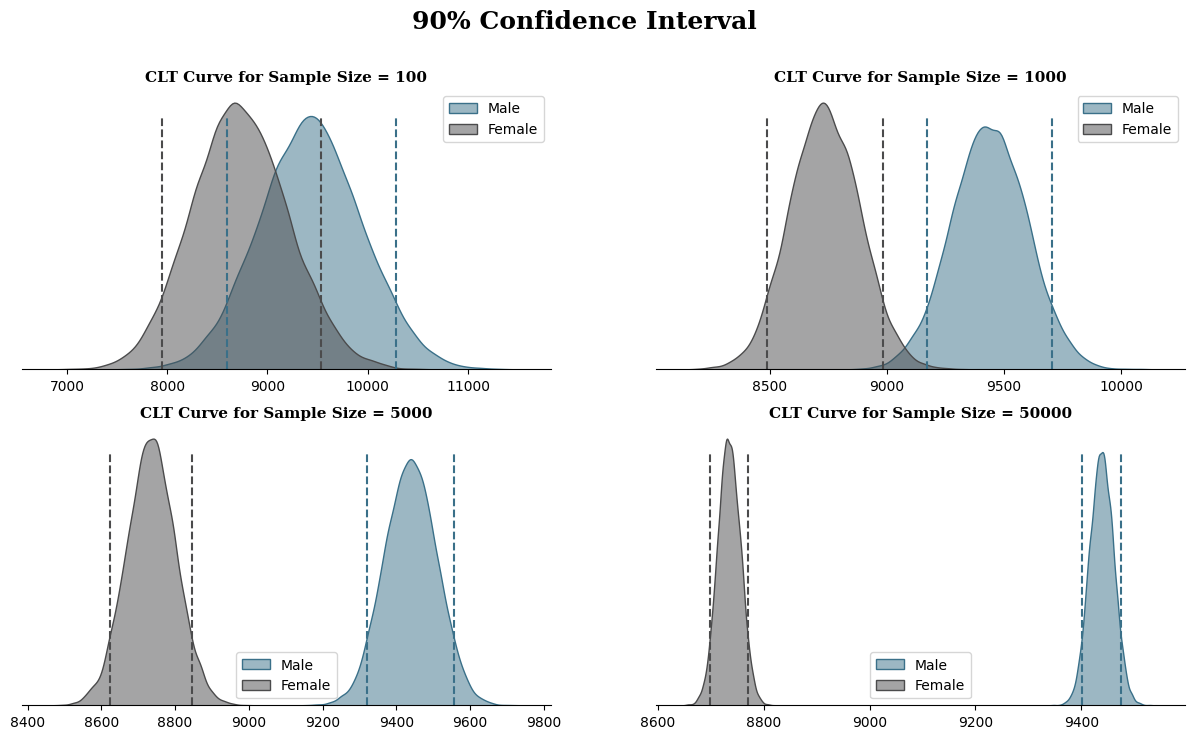

In [31]:
m_samp_90,f_samp_90 = plot(90)

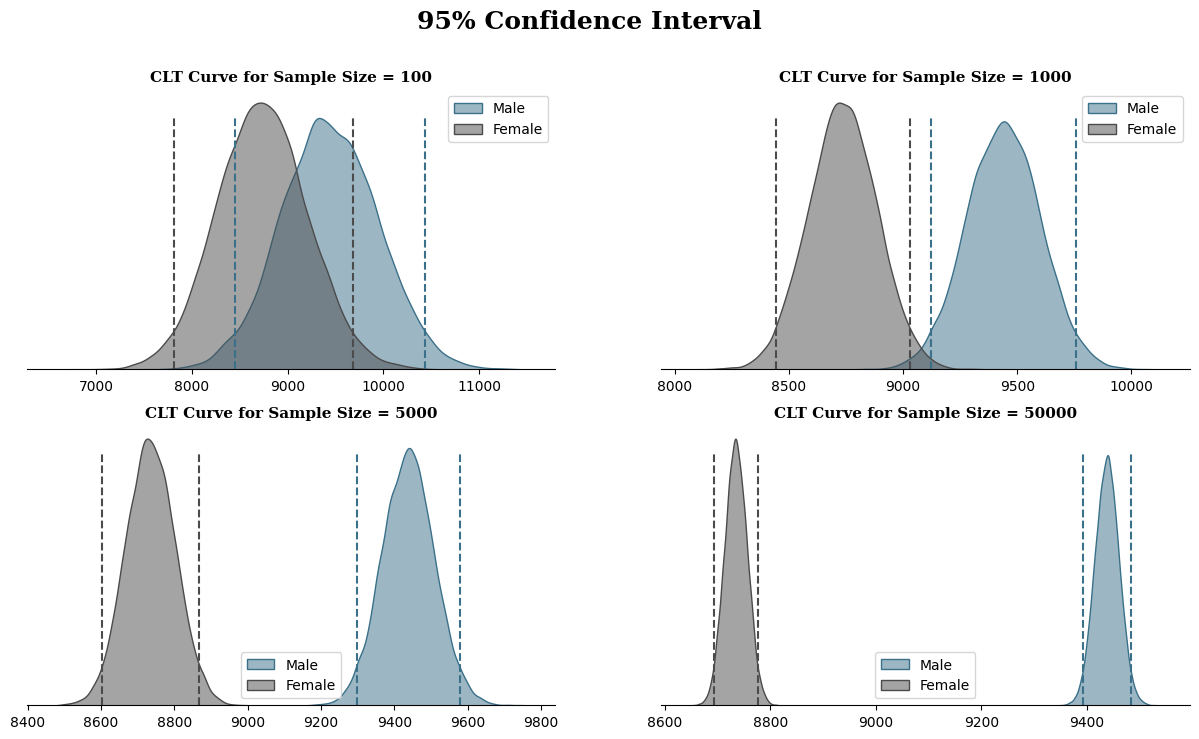

In [33]:
m_samp_95,f_samp_95 = plot(95)

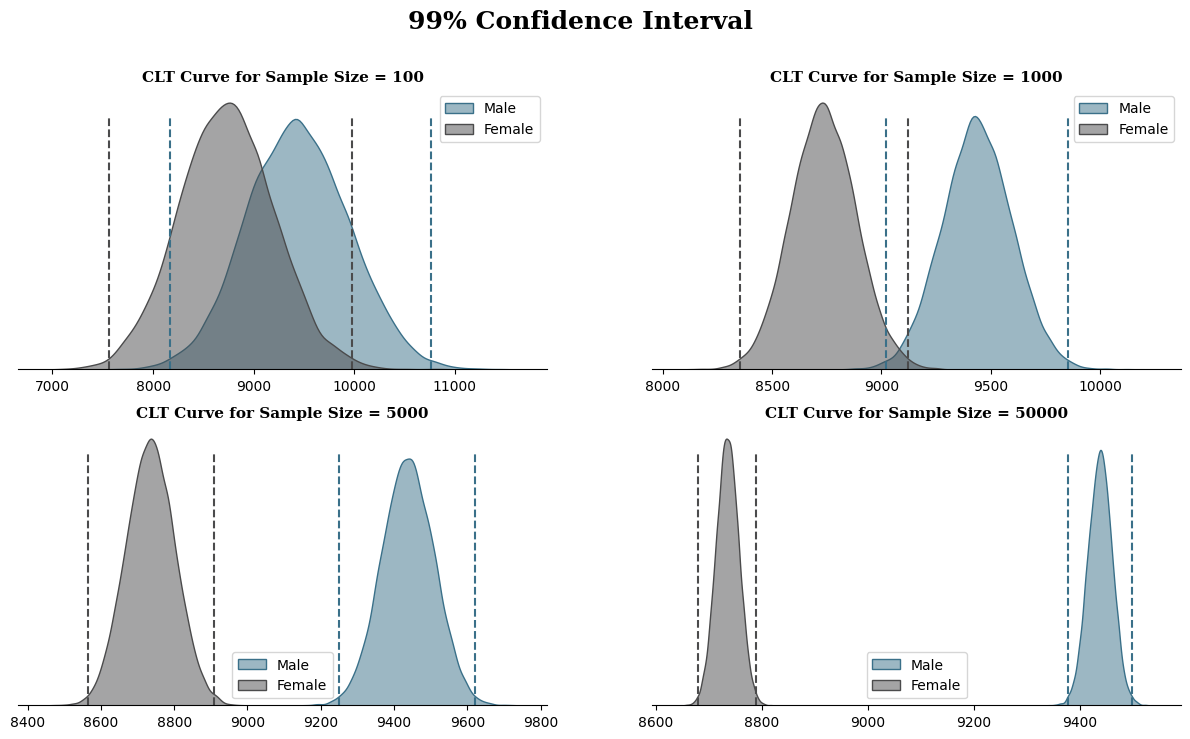

In [34]:
m_samp_99,f_samp_99 = plot(99)

**Are confidence intervals of average male and female spending overlapping?**

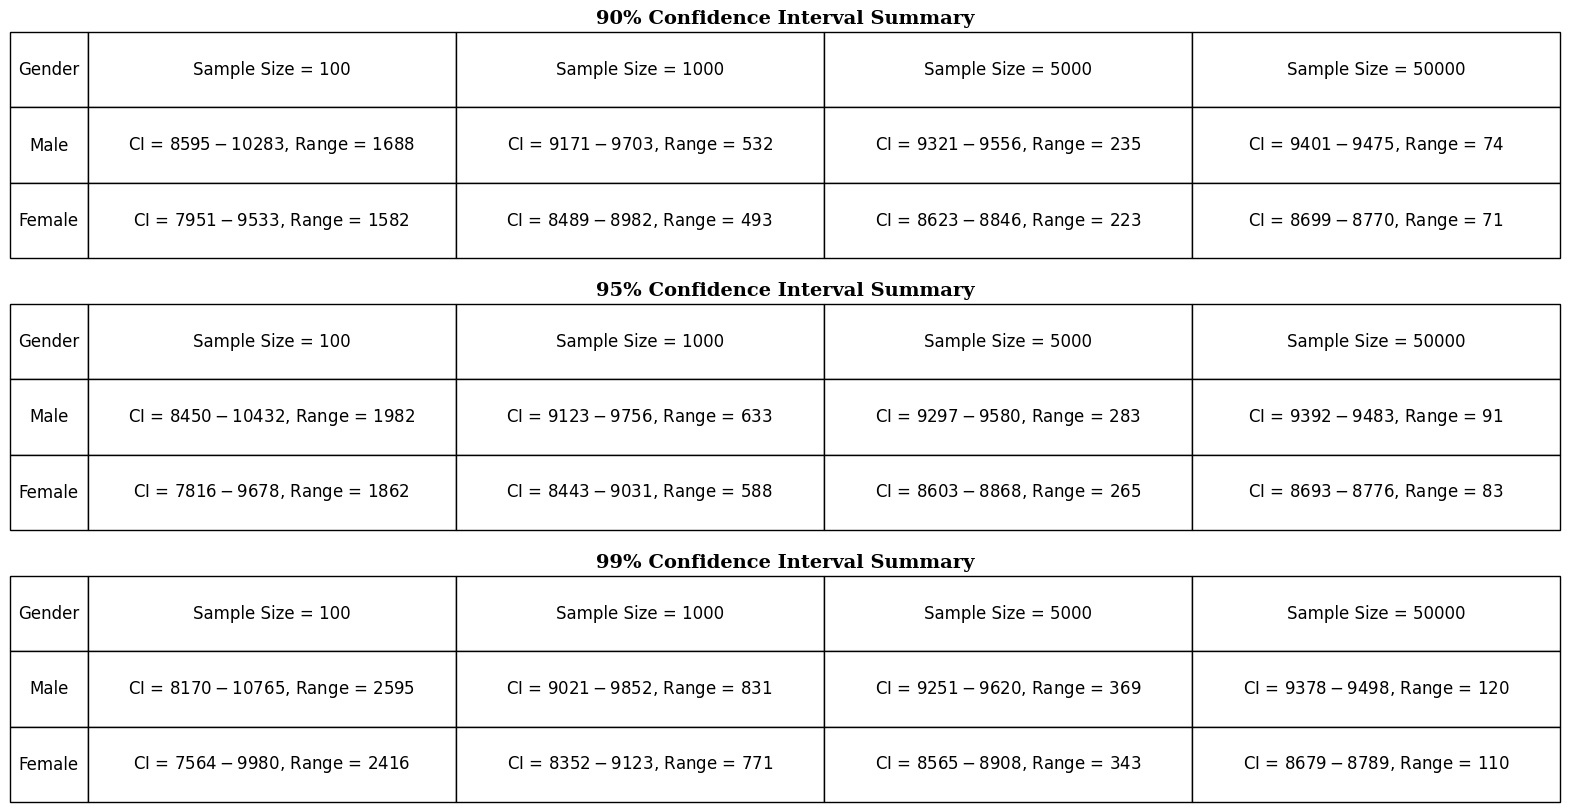

In [35]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male']
    f_ci = ['Female']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.
3. Population Average

We are 95% confident that the true population average for males falls between $9,393 and $9,483, and for females, it falls between $8,692 and $8,777.
4. Women spend less

Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.


**How can Walmart leverage this conclusion to make changes or improvements?**


Segmentation Opportunities

Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.
5.2. Pricing Strategies

Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.


**martial status vs Purchase**

In [36]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,0,3008927447,324731,3.01,0.59,9266.0
1,1,2086885295,225337,2.09,0.41,9261.0


<ipython-input-37-ef1652350e4a>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)


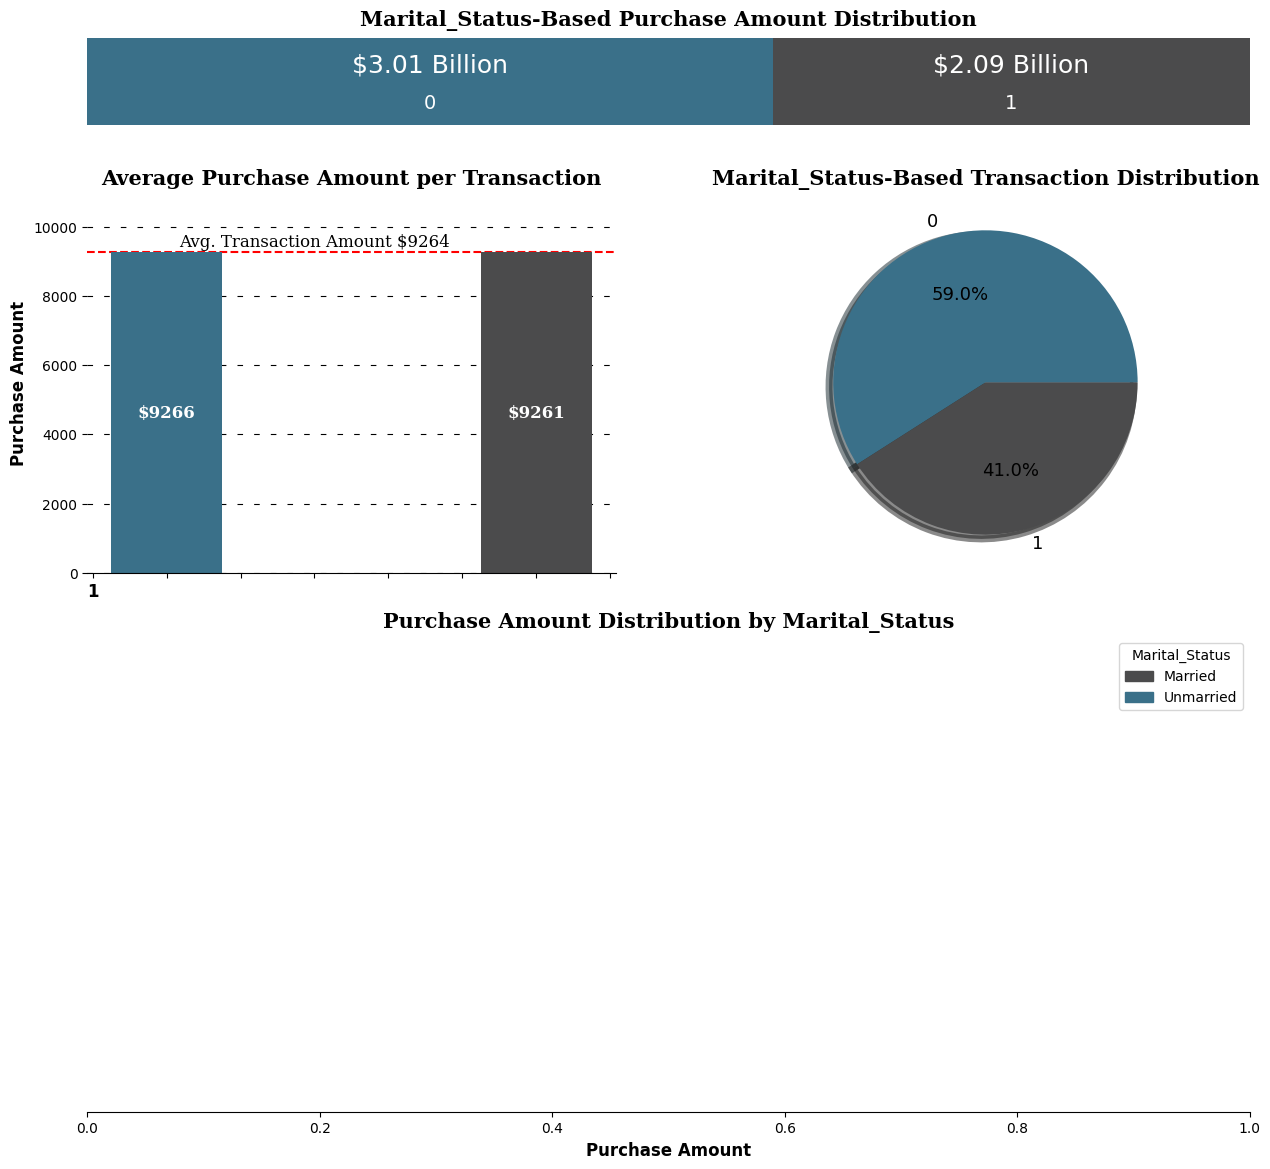

In [37]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Unmarried')
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Married')

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for marital status
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Marital_Status']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Marital_Status-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Marital_Status'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for Marital_Status disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Marital_Status'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])
color_map = [ "#4b4b4c","#3A7089"]

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,
            ax = ax3,hue_order = ['Married','Unmarried'])

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

 Total Sales and Transactions Comparison

The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value

The average purchase amount per transaction was almost similar for married and unmarried customers ($9261 vs $9266).
3. Distribution of Purchase Amount

As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

**Customer Age VS Purchase Amount**

In [38]:
#creating a df for purchase amount vs age group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


<ipython-input-39-bee4138c5a14>:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)


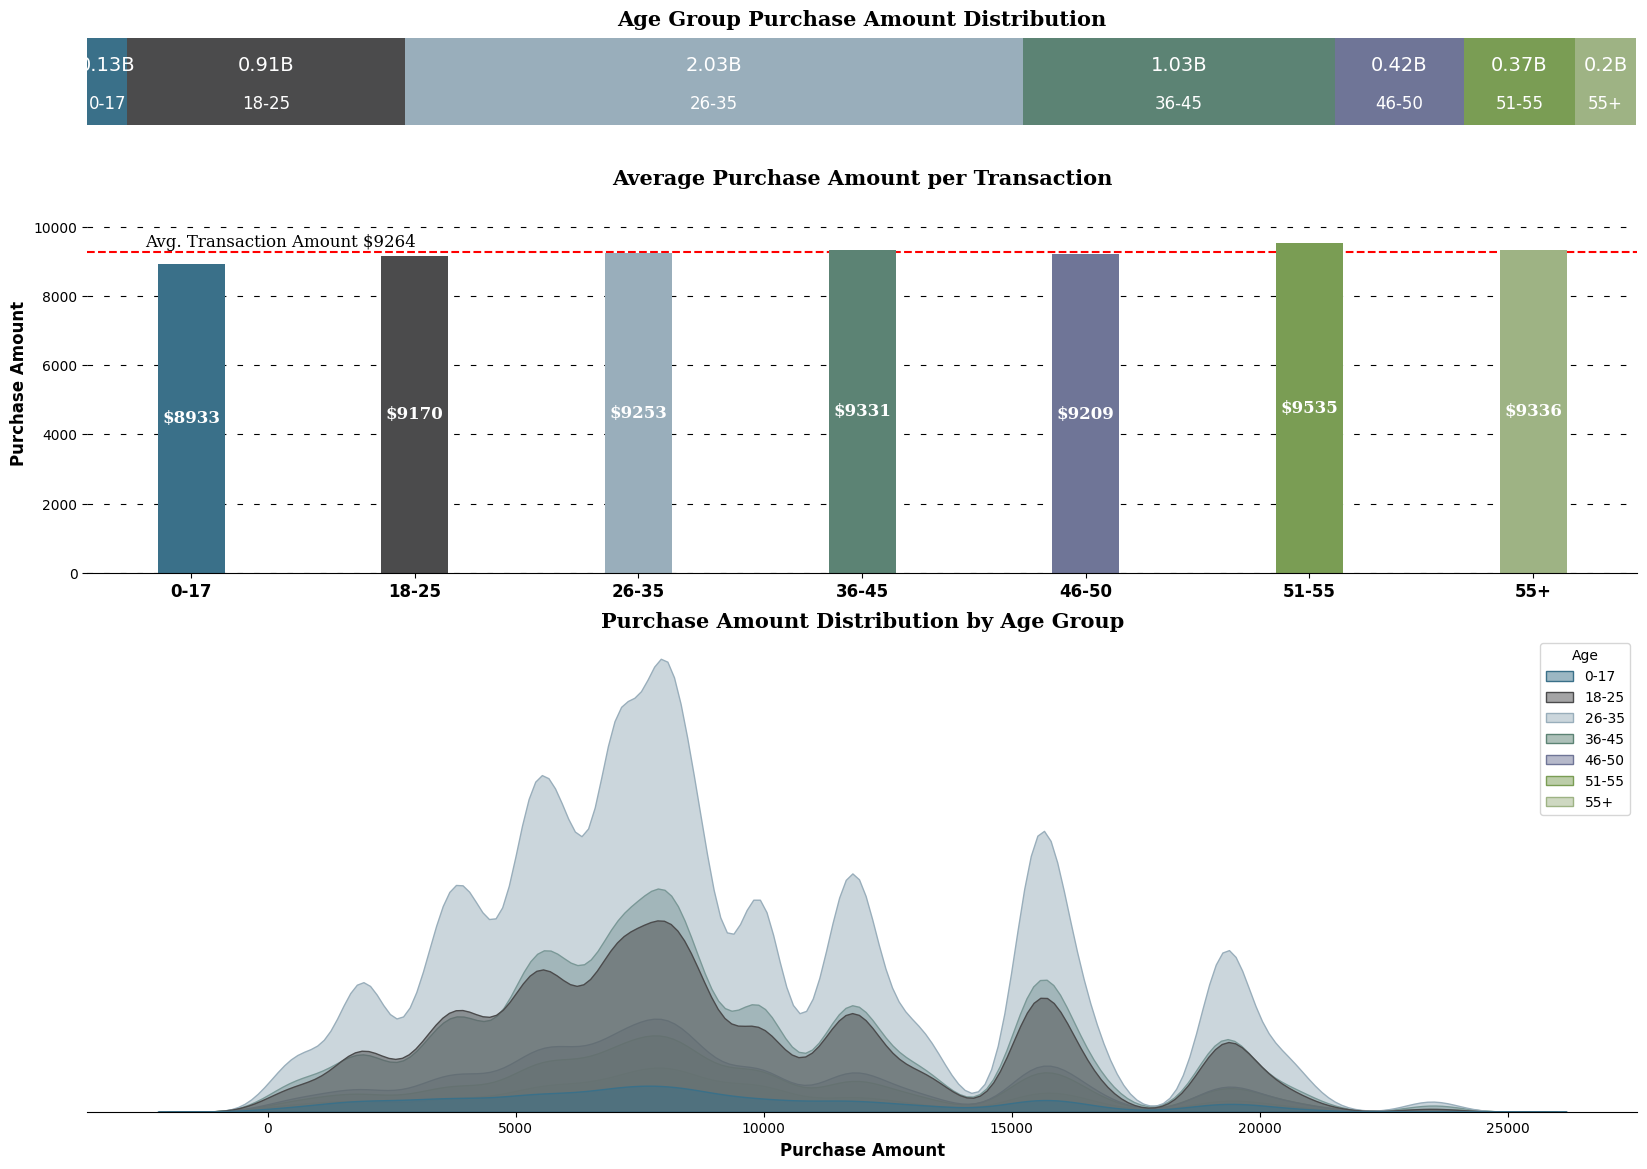

In [39]:
#setting the plot style
fig = plt.figure(figsize = (20,14))
gs = fig.add_gridspec(3,1,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

#plotting the visual
left = 0

for i in temp.index:
    ax.barh(temp.loc[0,'Age'],width = temp.loc[i,'%sum'],left = left,color = color_map[i],label = temp.loc[i,'Age'])
    left += temp.loc[i,'%sum']

#inserting the text
txt = 0.0 #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt,0.15,f"{temp.loc[i,'sum_in_billions']}B",
           va = 'center', ha='center',fontsize=14, color='white')

    #for age grp
    ax.text(temp.loc[i,'%sum']/2 + txt,- 0.20 ,f"{temp.loc[i,'Age']}",
           va = 'center', ha='center',fontsize=12, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Age Group Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1])


#plotting the visual
ax1.bar(temp['Age'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})


                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age', palette = color_map,fill = True, alpha = 0.5,
            ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

Insights
1. Total Sales Comparison

Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.

The age group 0-17 has the lowest sales percentage (2.6%), which is expected as they may not have as much purchasing power. Understanding their preferences and providing special offers could be beneficial, especially considering the potential for building customer loyalty as they age.

2. Average Transaction Value

While there is not a significant difference in per purchase spending among the age groups, the 51-55 age group has a relatively low sales percentage (7.2%)but they have the highest per purchase spending at 9535. Walmart could consider strategies to attract and retain this high-spending demographic.
3. Distribution of Purchase Amount

As seen above, the purchase amount for all age groups is not normally distributed

**How can Walmart leverage this conclusion to make changes or improvements?**

Targeted Marketing

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

Premium Services

Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

**Based on CLT & CI**

As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.49 with confidence is 90%.

Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%

For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]

For Male range for mean purchase with confidence interval 99% is [9328.03, 9409.07]

When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9225.71, 9305.43]

For married customer (sample size 100000) range for mean purchase with confidence interval 99% is [9218.62, 9303.25]

For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8702.35, 8751.09]

For Male (sample size 100000) range for mean purchase with confidence interval 90% is [9402.28, 9455.2]

**Insights-**

Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.

Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.

Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.

Ads can be targeted towards people who have spent between 1 to 2 years in their cities.

Ads can be targeted towards unmarried people.

Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.

Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.

More products popular among people with occupations 0, 4 and 7 can be kept in store.

Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)
Ads for products which cost between 9151 and 9790 can be targetted towards males.

Ads for products which cost between 8507 and 9051 can be targetted towards females.

Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.

Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

**Recommendations**

1.Target Male Shoppers

Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
2. Focus on 26 - 45 Age Group

With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.
3. Engage Younger Shoppers

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.
4. Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
5. Enhance the 51 - 55 Age Group Shopping Experience

Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.
6. Post-Black Friday Engagement

After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.